# Support Vector Machines - SVMs - Classification

O să începem să utilizăm conceptele teoretice despre SVM în Python. Pentru a putea folosi acest algoritm o să ne folosim de o funcție dintr-un fișier .py care ne permite să vizualizăm marginiile și acei Support Vectors

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Setul de date cu care o să lucrăm reprezintă simularea unui studiu medical prin care unui șoarece i se administrează un virus, iar după asta i se administrează două doze de medicamente măsurate în milimetri, iar după două săptămâni se verifică dacă șoricelul mai este infectat sau nu.

In [2]:
df = pd.read_csv('../data/DATA/mouse_viral_study.csv')

In [4]:
df.head()

,Med_1_mL,Med_2_mL,Virus Present
0,6.508231,8.582531,0
1,4.126116,3.073459,1
2,6.427870,6.369758,0
3,3.672953,4.905215,1
4,1.580321,2.440562,1


<AxesSubplot:xlabel='Med_1_mL', ylabel='Med_2_mL'>

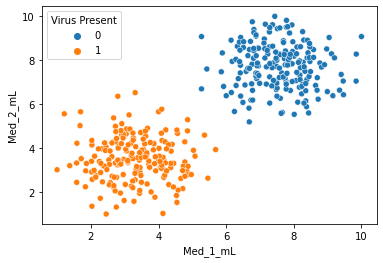

In [5]:
sns.scatterplot(x='Med_1_mL', y='Med_2_mL', data=df, hue='Virus Present')

Din acest plot se vede acea separare de clase despre care am vorbit. Există doar două clase în acest set de date, iar acestea sunt ușor și clar separabile. Acum trebuie să facem ceea ce am discutat anterior, să stabilim acele hyperplane, iar apoi să explorăm cu parametrii și kernel-uri diferite. Pentru plot-ul de mai sus putem să creem un hyperplane manual care să separe cele două clase

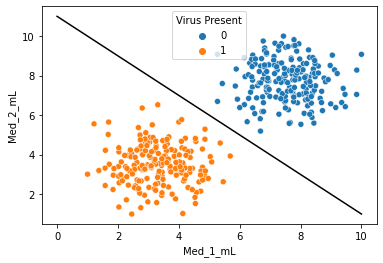

In [6]:
sns.scatterplot(x='Med_1_mL', y='Med_2_mL', data=df, hue='Virus Present')

x = np.linspace(0, 10, 100)
m = -1
b = 11
y = m * x + b
plt.plot(x, y, 'black')

Acum trebuie să înțelegm cum anume un SVM poate să stabilească automat acest hyperplane pentru a separa cât mai corect clasele. Pentru asta trebuie să lucrăm cu Support Vector Machines. Acești algoritmi se găsesc în sklearn.svm. Din acea familie o să importăm pentru moment SVC (Support Vector Classifier). Știm că pentru a trece de la un Support Vector Classifier la Support Vector Machines trebuie doar să adaugăm acel kernel.

In [7]:
from sklearn.svm import SVC

In [8]:
help(SVC)

Help on class SVC in module sklearn.svm._classes:

class SVC(sklearn.svm._base.BaseSVC)
 |  SVC(*, C=1.0, kernel='rbf', degree=3, gamma='scale', coef0=0.0, shrinking=True, probability=False, tol=0.001, cache_size=200, class_weight=None, verbose=False, max_iter=-1, decision_function_shape='ovr', break_ties=False, random_state=None)
 |  
 |  C-Support Vector Classification.
 |  
 |  The implementation is based on libsvm. The fit time scales at least
 |  quadratically with the number of samples and may be impractical
 |  beyond tens of thousands of samples. For large datasets
 |  consider using :class:`~sklearn.svm.LinearSVC` or
 |  :class:`~sklearn.linear_model.SGDClassifier` instead, possibly after a
 |  :class:`~sklearn.kernel_approximation.Nystroem` transformer.
 |  
 |  The multiclass support is handled according to a one-vs-one scheme.
 |  
 |  For details on the precise mathematical formulation of the provided
 |  kernel functions and how `gamma`, `coef0` and `degree` affect each
 

Acest model are ca și parametrii importanți parametrul 'C' și 'kernel'. Parametrul 'C' reprezintă acea rație care permite misclasificarea unor elemente. Valoarea pe care o atribuim este invers proporțională, prin urmare o valoare mai mică permite mai multe misclasificări și invers. Parametrul de 'kernel' reprezintă kernel-ul pe care îl utilizăm pentru a trece de la un SVC la SVM. Mai mult o să ne uităm peste partea de vizualizare, nu o să creem un proiect complet în această secțiune.

In [9]:
X = df.drop('Virus Present', axis=1)
y = df['Virus Present']

O să ne creem un model de SVC în care o să alegem pentru început un kernel simplu de tip liniar care o să ne creeze o separare liniară între aceeste clase. Pentru parametrul de C o să alegem o valoare mare astfel încât să nu prea permită misclasificarea valorilor, deoarece datele sunt ușor separabile între ele.

In [10]:
model = SVC(kernel='linear', C=1_000)

In [11]:
model.fit(X, y)

SVC(C=1000, kernel='linear')

După crearea și antrenarea modelului putem să vizualizăm acel hyperplane creat de SVC utilizând metoda 'plot_svm_boundary' din fișierul 'svm_margin_plot.py'

In [12]:
from svm_margin_plot import plot_svm_boundary

/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


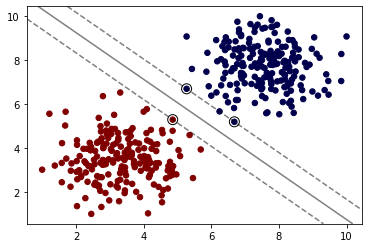

In [13]:
plot_svm_boundary(model, X, y)

Metoda respectivă a creat un plot în care a afișat hyperplane-ul, marginile și acei Support Vectors. Cu kernel-ul setat la linear, i-am spus acestui model de SVC să ne caute o linie dreaptă și să extindă marginile până ce se lovește de vectorii de suport. În continuare o să eplorăm valorile diferite pentru parametrul de kernel și argumentele diferite pe care pot să îi primească acești kernels.

Acuma o să creem un model care are ca și kernel tot un kernel de tip 'linear', dar are o valoare mai mică de C ca să vedem cum o să arate acum graficul de mai sus.

In [15]:
model = SVC(kernel='linear', C=0.05)
model.fit(X, y)

SVC(C=0.05, kernel='linear')

/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


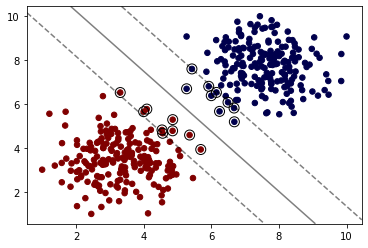

In [16]:
plot_svm_boundary(model, X, y)

După cum spuneam, acest parametru C este inver-proporțional. Cu cât valoarea este mai mică, cu atâta permite ca mai multe valori să fie mis clasificate (după cum se poate observa și în graficul de mai sus)

În continuare o să verificăm cu un alt kernel, și anume cu 'rbf' (radial basis function). Acest kernel este printre cei mai utilizați și ar avea cea mai bună performanță pentru un SVM. Acesta este și kernel-ul prestabilit din Scikit-Learn

/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


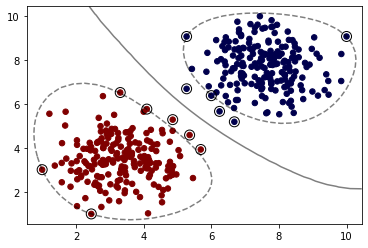

In [17]:
model = SVC(kernel='rbf', C=1)
model.fit(X, y)
plot_svm_boundary(model, X, y)

Vedem că după cum îi spune și numele, acest kernel creează o rază pentru cele două clustere de date. Mai există și parametrul 'gamma' care poate fi selectat pentru acest tip de kernel. Există varianta de 'scale' (care este cea prestabilită) și varianta de 'auto'. De asemenea se mai poate oferi ca și valoare un float prin care să precizăm manual valoarea pentru parametrul 'gamma'. O să creem un alt model ca și cel de sus, însă pentru gamma o să specificăm acuma valoarea 'auto'

/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


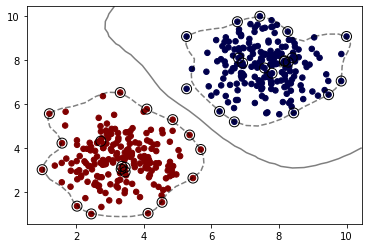

In [18]:
model = SVC(kernel='rbf', C=1, gamma='auto')
model.fit(X, y)
plot_svm_boundary(model, X, y)

Din moment ce am setat gamma ca fiind 'auto' se pare că modelul prinde prea mult noise din datele respective, prin urmare cel mai probabil o să avem un caz de overfitting.

După cum se poate observa, dacă alegem valori diferite fie pentru kernel fie pentru C sau gamma, obținem rezultatele diferite. Care variantă este ceva mai bun (valoarea de , kernel-ul sau valoarea pentru gamma) depinde de setul de date cu care lucrăm, iar pentru a găsi valorile cele mai potrivite pentru un anumit caz putem să utilizăm partea de GridSearchCV împreună cu cross_validation cum am tot făcut până acuma în cadrul acestui curs

## Recapitulare

În această lecție am învățat următoarele lucruri:

    1. De unde să importăm un model de Support Vector Classifier
        
        from sklearn.svm import SVC 

            # pentru a trece de la Support Vector Classifier la Support Vector Machines trebuie să utilizăm un kernel

    2. Un model de SVC are următorii parametrii importanți:

        kernel = kernel-ul pe care să îl utilizăm (linear, poly, rbf)

        C = valoarea care precizează numărul de missclassification permise (este inver-proporțional, un număr mic acceptă un număr mare de mis clasificări)

        gamma = utilizat împreună cu anumite valori pentru kernel


        Să se consulte documentația pentru mai multe informații

    3. Pentru a vizualiza hyperplane-ul împreună cu marginile și vectorii de suport o să utilizăm metoda 'plot_svm_boundary(model, X, y)'

    4. Pentru a găsi valorile cele mai bune la acești parametrii putem utiliza GridSearchCV împreună cu cross_validation